In [3]:
# loading the dataset
import pandas as pd
df = pd.read_csv("anomaly_detection.csv")
df.head()

,timestamp,user_id,login_duration_min,data_accessed_MB,files_downloaded,remote_access
0,2025-04-06 04:00:00,user_023,33.417560,229.196409,3,No
1,2025-04-11 23:00:00,user_040,11.951179,221.816183,4,No
2,2025-04-19 07:00:00,user_044,40.490092,178.529723,4,No
3,2025-04-19 09:00:00,user_005,15.915387,227.164901,5,No
4,2025-04-06 00:00:00,user_012,8.761043,175.528028,4,Yes


In [4]:
df.describe()

,login_duration_min,data_accessed_MB,files_downloaded
count,505.000000,505.000000,505.000000
mean,30.673913,231.012570,3.384158
std,17.802305,335.673082,5.674272
min,3.000000,5.000000,0.000000
25%,22.742562,172.226144,2.000000
50%,29.809838,206.278823,3.000000
75%,36.296288,238.020733,4.000000
max,300.000000,5000.000000,100.000000


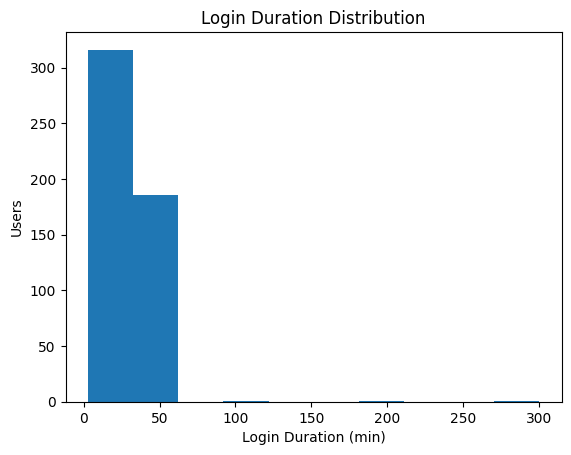

In [6]:
import matplotlib.pyplot as plt
plt.hist(df["login_duration_min"])
plt.xlabel("Login Duration (min)")
plt.ylabel("Users")
plt.title("Login Duration Distribution")
plt.show()

In [ ]:
# The majority of users have login durations below 60 minutes, indicating normal usage behavior. A small number of users show extremely long login durations, which are rare compared to the rest. These long sessions may indicate unattended access or suspicious activity.

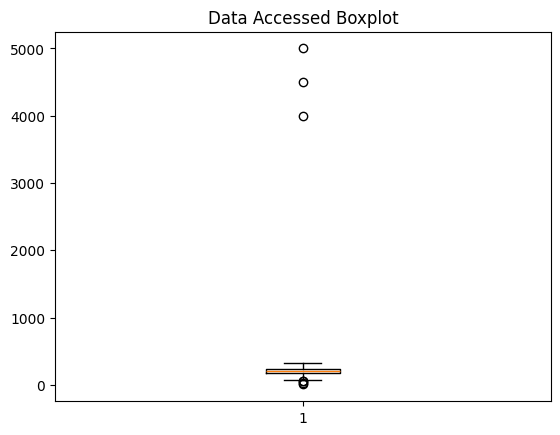

In [7]:
plt.boxplot(df["data_accessed_MB"])
plt.title("Data Accessed Boxplot")
plt.show()

In [ ]:
# Most users access a moderate amount of data, as shown by the compact box region. However, several users appear as clear outliers with exceptionally high data access. These extreme values suggest potential data exfiltration or abnormal usage patterns.

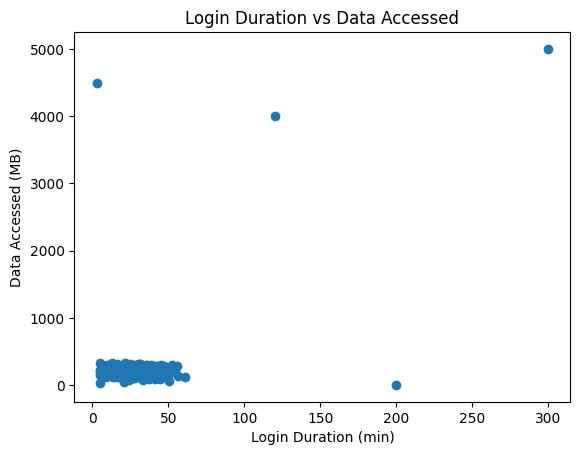

In [8]:
plt.scatter(df["login_duration_min"], df["data_accessed_MB"])
plt.xlabel("Login Duration (min)")
plt.ylabel("Data Accessed (MB)")
plt.title("Login Duration vs Data Accessed")
plt.show()

In [ ]:
# Most users cluster around short to moderate login durations with proportional data access. A few users significantly deviate from this pattern by accessing very large amounts of data in short or unusually long sessions. Such behavior strongly indicates anomalous and potentially risky user activity.

In [10]:
import numpy as np
df["z_login_duration_min"] = (df["login_duration_min"] - df["login_duration_min"].mean()) / df["login_duration_min"].std()
z_anomalies = df[np.abs(df["z_login_duration_min"]) > 2]
z_anomalies

,timestamp,user_id,login_duration_min,data_accessed_MB,files_downloaded,remote_access,z_login_duration_min
79,2025-04-18 00:00:00,user_033,200.0,5.0,100,No,9.51147
83,2025-04-15 00:00:00,user_036,300.0,5000.0,50,Yes,15.12872
251,2025-04-17 00:00:00,user_032,120.0,4000.0,60,Yes,5.01767


In [ ]:
# Users whose login duration deviated significantly from the average were flagged using Z-score analysis.Users whose data access deviated significantly from the average were flagged using Z-score analysis.

In [11]:
import numpy as np
df["z_data"] = (
    df["data_accessed_MB"] - df["data_accessed_MB"].mean()
) / df["data_accessed_MB"].std()
z_anomalies = df[np.abs(df["z_data"]) > 2]
z_anomalies

,timestamp,user_id,login_duration_min,data_accessed_MB,files_downloaded,remote_access,z_login_duration_min,z_data
83,2025-04-15 00:00:00,user_036,300.0,5000.0,50,Yes,15.128720,14.207238
251,2025-04-17 00:00:00,user_032,120.0,4000.0,60,Yes,5.017670,11.228149
314,2025-04-19 00:00:00,user_045,3.0,4500.0,0,Yes,-1.554513,12.717694


In [ ]:
# Users whose data access deviated significantly from the average were flagged using Z-score analysis.

In [15]:
df["remote_access"] = df["remote_access"].map({"Yes": 1, "No": 0})

In [27]:
features = df[
    ["login_duration_min", "data_accessed_MB", "files_downloaded", "remote_access"]
]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05, random_state=42)
df["iso_flag"] = iso.fit_predict(scaled_features)
ml_anomalies = df[df["iso_flag"] == -1]
ml_anomalies

,timestamp,user_id,login_duration_min,data_accessed_MB,files_downloaded,remote_access,z_login_duration_min,z_data,iso_flag
4,2025-04-06 00:00:00,user_012,8.761043,175.528028,4,1,-1.230901,-0.165293,-1
8,2025-04-16 10:00:00,user_035,28.419921,280.685563,4,1,-0.126612,0.147980,-1
10,2025-04-02 15:00:00,user_007,24.398190,174.197764,7,1,-0.352523,-0.169256,-1
36,2025-04-13 11:00:00,user_008,50.754008,57.572869,7,0,1.127949,-0.516692,-1
73,2025-04-20 06:00:00,user_026,31.708654,190.735617,8,1,0.058124,-0.119989,-1
79,2025-04-18 00:00:00,user_033,200.000000,5.000000,100,0,9.511470,-0.673312,-1
83,2025-04-15 00:00:00,user_036,300.000000,5000.000000,50,1,15.128720,14.207238,-1
84,2025-04-10 16:00:00,user_011,45.231241,149.919000,1,1,0.817722,-0.241585,-1
118,2025-04-18 01:00:00,user_013,9.266098,214.059571,2,1,-1.202531,-0.050504,-1
172,2025-04-07 15:00:00,user_039,47.553408,148.674235,4,1,0.948163,-0.245293,-1


In [28]:
df["iso_flag"].value_counts()


iso_flag
 1    479
-1     26
Name: count, dtype: int64

In [29]:
final_anomalies = df[
    (df["iso_flag"] == -1) &
    (np.abs(df["z_data"]) > 2)
]

In [30]:
final_anomalies

,timestamp,user_id,login_duration_min,data_accessed_MB,files_downloaded,remote_access,z_login_duration_min,z_data,iso_flag
83,2025-04-15 00:00:00,user_036,300.0,5000.0,50,1,15.128720,14.207238,-1
251,2025-04-17 00:00:00,user_032,120.0,4000.0,60,1,5.017670,11.228149,-1
314,2025-04-19 00:00:00,user_045,3.0,4500.0,0,1,-1.554513,12.717694,-1


In [31]:
final_anomalies_sorted = final_anomalies.sort_values(
    by="data_accessed_MB",
    ascending=False
)

top_5 = final_anomalies_sorted.head(5)
top_5


,timestamp,user_id,login_duration_min,data_accessed_MB,files_downloaded,remote_access,z_login_duration_min,z_data,iso_flag
83,2025-04-15 00:00:00,user_036,300.0,5000.0,50,1,15.128720,14.207238,-1
314,2025-04-19 00:00:00,user_045,3.0,4500.0,0,1,-1.554513,12.717694,-1
251,2025-04-17 00:00:00,user_032,120.0,4000.0,60,1,5.017670,11.228149,-1
